<a href="https://colab.research.google.com/github/rafae1franco/BreastCancer_evaluate/blob/main/BreastCancer_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

# Mapear os valores da coluna "diagnosis"
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separar as features e os rótulos
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

In [29]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Normalizar os dados com StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter para arrays NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [31]:
# Criar o modelo com Input no início
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),  # Camada de entrada
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=300, batch_size=10, validation_split=0.1)

#Quanto maior o valor em "epochs", maior é o Accuracy(Porcentagem de acerto).

Epoch 1/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 7.5804e-10 - val_accuracy: 0.9565 - val_loss: 0.1544
Epoch 2/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.4150e-10 - val_accuracy: 0.9565 - val_loss: 0.1541
Epoch 3/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.5147e-10 - val_accuracy: 0.9565 - val_loss: 0.1538
Epoch 4/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3631e-09 - val_accuracy: 0.9565 - val_loss: 0.1541
Epoch 5/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.4458e-10 - val_accuracy: 0.9565 - val_loss: 0.1534
Epoch 6/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.6706e-10 - val_accuracy: 0.9565 - val_loss: 0.1528
Epoch 7/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.1799e-09 - val_accuracy: 0.9565 - val_loss: 0.1521
Epoch 8/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.137

In [39]:
# Função para prever o diagnóstico com base em um conjunto de features
def predict_breast_cancer(features):
    # Converte as features para um DataFrame com as mesmas colunas do treinamento
    features_df = pd.DataFrame([features], columns=X.columns)
    features_scaled = scaler.transform(features_df)
    # Prever todas as entradas de uma vez
    prediction = model.predict(features_scaled, verbose=0)  # Evitar rastreamento excessivo
    return 'Maligno' if prediction[0] > 0.5 else 'Benigno'

# Avaliar o modelo nos dados de teste
y_pred = model.predict(X_test, verbose=0)  # Evitar rastreamento excessivo
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calcular e imprimir a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 95.61%


Previsao: Maligno, Atual: Benigno


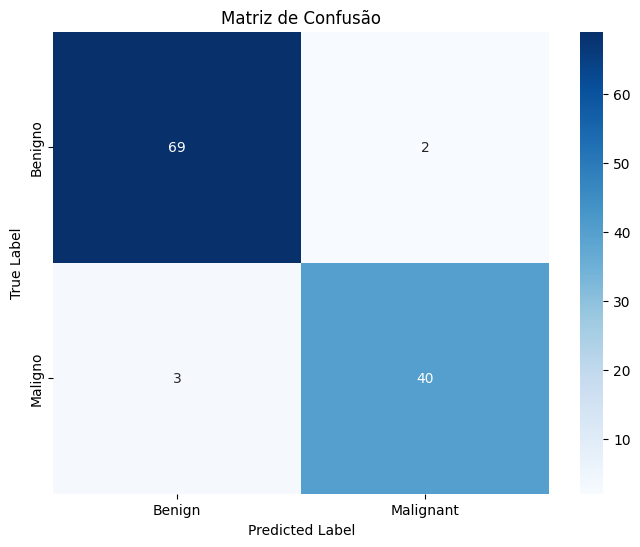

In [40]:
# Exemplo de previsão com um conjunto de features do teste
example_features = X_test[0]
print(f'Previsao: {predict_breast_cancer(example_features)}, Atual: {"Maligno" if y_test[0] == 1 else "Benigno"}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusão')
plt.show()